In [15]:
library(ggplot2)
library(repr)
library(plyr)
library(dplyr)
library(circlize)
library(magrittr)

In [27]:
df = read.csv('/home/cloves/Documentos/data_science/analise_sentimento_whatsApp/menciona.csv',
             sep=';', stringsAsFactors=F)

In [28]:
head(df)

X,nome,menciona
2668,Andre,Camile
2676,Vinicius,Andre
2707,Vinicius,Raul
2710,Evandro,Raul
2736,Evandro,Camile
2741,Evandro,Andre


In [29]:
df2 <- ddply(df, .(nome, menciona), c("nrow"))

In [37]:
head(df2)

nome,menciona,nrow
Andre,Camile,2
Andre,Cloves,2
Andre,Evandro,6
Andre,Paula,2
Andre,Raul,3
Andre,Vinicius,7


In [38]:
# pegar só o maior nrow
# para cada pessoa
resultado <- df2 %>% 
             group_by(nome) %>%
             filter(nrow == max(nrow)) %>%
             arrange(nome, nrow)

In [39]:
resultado

nome,menciona,nrow
Andre,Vinicius,7
Camile,Evandro,3
Cloves,Paula,3
Evandro,Cloves,12
Paula,Vinicius,4
Raul,Vinicius,14
Robson,Vinicius,3
Vinicius,Raul,19


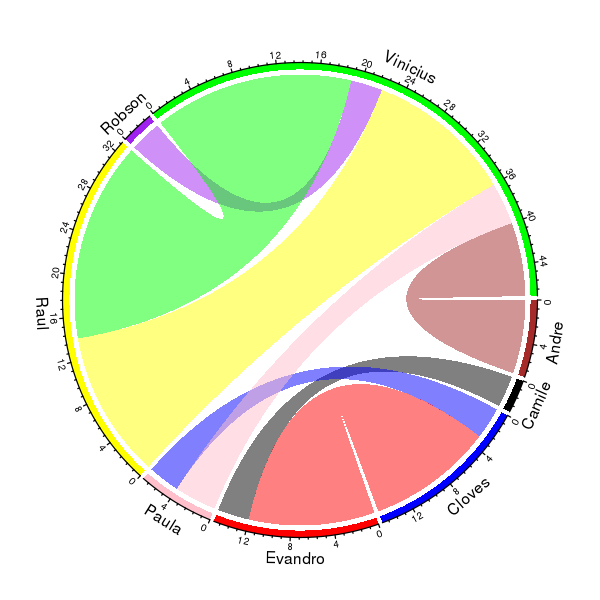

In [40]:
options(repr.plot.width=5, repr.plot.height=5)

grid_col = c(Evandro = 'red', Camile = 'black', Cloves = 'blue', Raul = 'yellow', 
             Andre = 'brown', Vinicius = 'green', Robson = 'purple', 
             Paula = 'pink')

chordDiagram(resultado, grid.col = grid_col)